In [47]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
import networkx as nx

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar,StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
nx_graph = nx.read_graphml("2012-12-02.graphml")

In [5]:
pr = nx.pagerank(nx_graph, alpha=0.9)

In [6]:
pr

{'81567039': 3.163840761665286e-05,
 '81567155': 4.595772655208623e-05,
 '81567156': 4.595772655208623e-05,
 '81526809': 3.163840761665286e-05,
 '79800777': 0.029172607708657206,
 '81567157': 4.595772655208623e-05,
 '81566868': 3.163840761665286e-05,
 '81567158': 4.595772655208623e-05,
 '81567159': 4.595772655208623e-05,
 '81567106': 3.163840761665286e-05,
 '81567160': 4.595772655208623e-05,
 '81509640': 9.817637791697596e-05,
 '81554297': 3.163840761665286e-05,
 '81567161': 0.00016051227803555316,
 '81567162': 6.027704548751959e-05,
 '77573048': 0.008836840444660673,
 '81554323': 3.163840761665286e-05,
 '81567163': 6.027704548751959e-05,
 '81567164': 4.595772655208623e-05,
 '81554304': 3.163840761665286e-05,
 '81567165': 4.595772655208623e-05,
 '81554312': 3.163840761665286e-05,
 '81567166': 6.027704548751959e-05,
 '81554320': 3.163840761665286e-05,
 '81567167': 4.595772655208623e-05,
 '81566704': 3.163840761665286e-05,
 '81567168': 4.595772655208623e-05,
 '81567169': 0.00037437840361

In [53]:
x = nx.degree(nx_graph,weight="n_tx")
x

DiDegreeView({'81567039': 2, '81567155': 3, '81567156': 1, '81526809': 2, '79800777': 1654, '81567157': 1, '81566868': 2, '81567158': 3, '81567159': 1, '81567106': 2, '81567160': 3, '81509640': 3, '81554297': 2, '81567161': 17, '81567162': 7, '77573048': 694, '81554323': 2, '81567163': 4, '81567164': 4, '81554304': 2, '81567165': 4, '81554312': 2, '81567166': 7, '81554320': 2, '81567167': 4, '81566704': 2, '81567168': 3, '81567169': 7, '78504984': 75, '81424998': 1, '81519097': 2, '81567170': 5, '81567171': 1, '81566891': 5, '81567172': 4, '81567173': 4, '81567174': 3, '81567175': 3, '81567176': 3, '81567177': 4, '81567178': 3, '81567179': 4, '81567180': 3, '81567181': 5, '81567182': 3, '81567059': 2, '81567183': 3, '80257383': 2, '81567184': 4, '81567185': 3, '81567186': 3, '81567187': 4, '81567188': 2, '81567189': 4, '81567190': 3, '81567191': 2, '81567192': 3, '81567193': 3, '81567194': 4, '81567195': 3, '81567196': 6, '81567197': 3, '81567198': 3, '81567199': 3, '81567200': 3, '815

In [10]:
my_df = pd.DataFrame(pr,index=[0]).T

In [11]:
print(my_df)

                 0
81567039  0.000032
81567155  0.000046
81567156  0.000046
81526809  0.000032
79800777  0.029173
...            ...
81573964  0.000058
81573965  0.000058
81573966  0.000117
81573967  0.000084
81573968  0.000069

[13093 rows x 1 columns]


In [32]:
nx.set_node_attributes(nx_graph, pr,'pr')

In [ ]:
g1 = StellarGraph.from_networkx(
    nx_graph,node_features=my_df
)

In [38]:
print(g1.info())

StellarDiGraph: Directed multigraph
 Nodes: 13093, Edges: 24867

 Node types:
  default: [13093]
    Features: float32 vector, length 1
    Edge types: default-default->default

 Edge types:
    default-default->default: [24867]
        Weights: all 1 (default)
        Features: none


In [9]:
df_nodes

,81567039,81567155,81567156,81526809,79800777,81567157,81566868,81567158,81567159,81567106,...,80646700,81573960,81573961,81573962,81573963,81573964,81573965,81573966,81573967,81573968
81567039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81567155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81567156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81526809,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79800777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81573964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
81573965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81573966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81573967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [230]:
df_edges

,source,target,value,n_tx
0,81567039,81567155,1.139179e+12,1
1,81567039,81567156,1.019400e+08,1
2,81567155,81568176,1.114108e+12,1
3,81567155,221,2.507104e+10,1
4,81526809,79800777,6.059134e+08,1
...,...,...,...,...
24862,81573965,79526935,4.000000e+06,1
24863,81573966,81573967,3.386418e+07,1
24864,81573966,79526935,4.000000e+06,1
24865,81573967,81573968,3.281418e+07,1


In [43]:
type(x)

networkx.classes.reportviews.DiDegreeView

In [44]:
degree_values = dict(x)

In [45]:
len(degree_values)

13093

In [49]:
a = np.array(sorted(degree_values.items(), key=lambda x: x[1], reverse=True))
print(a)

[['79526935' '10446']
 ['221' '2178']
 ['79800777' '1654']
 ...
 ['80646700' '1']
 ['81573962' '1']
 ['81573968' '1']]


In [50]:
len(a)

13093

In [51]:
a

array([['79526935', '10446'],
       ['221', '2178'],
       ['79800777', '1654'],
       ...,
       ['80646700', '1'],
       ['81573962', '1'],
       ['81573968', '1']], dtype='<U21')

In [16]:
Gs = StellarGraph(nx_graph, node_features=df_nodes)

/var/folders/xb/5f583bk12fq8fx4nb8n_t1sr0000gn/T/ipykernel_70183/2062331324.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  Gs = StellarGraph(nx_graph, node_features=df_nodes)


In [17]:
print(Gs.info())

StellarGraph: Undirected multigraph
 Nodes: 13093, Edges: 24867

 Node types:
  default: [13093]
    Features: float32 vector, length 13093
    Edge types: default-default->default

 Edge types:
    default-default->default: [24867]
        Weights: all 1 (default)
        Features: none


In [241]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(Gs)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 2486 positive and 2486 negative edges. **


In [242]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 2238 positive and 2238 negative edges. **


In [243]:
batch_size = 20
epochs = 20
num_samples = [20, 10]

In [244]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)

In [245]:
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

In [246]:
layer_sizes = [20, 20]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
)

In [247]:
# Build the model and expose input and output sockets of graphsage model
# for link prediction
x_inp, x_out = graphsage.in_out_tensors()

/Users/liminghao/miniconda3/envs/stellar/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [248]:
prediction = link_classification(
    output_dim=1, output_act="relu", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [249]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=["acc"],
)

In [250]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

249/249 [==============================] - 34s 137ms/step - loss: 2.4845 - acc: 0.5698

Train Set Metrics of the initial (untrained) model:
	loss: 2.6189
	acc: 0.5590

Test Set Metrics of the initial (untrained) model:
	loss: 2.4845
	acc: 0.5698


In [251]:
history = model.fit(train_flow, epochs=epochs, validation_data=test_flow, verbose=2)

Epoch 1/20
224/224 - 116s - loss: 0.8283 - acc: 0.7277 - val_loss: 0.6573 - val_acc: 0.7444 - 116s/epoch - 516ms/step
Epoch 2/20
224/224 - 102s - loss: 0.5778 - acc: 0.7817 - val_loss: 0.6060 - val_acc: 0.7737 - 102s/epoch - 454ms/step
Epoch 3/20
224/224 - 108s - loss: 0.4512 - acc: 0.8456 - val_loss: 0.6145 - val_acc: 0.7870 - 108s/epoch - 484ms/step
Epoch 4/20
224/224 - 108s - loss: 0.3988 - acc: 0.8626 - val_loss: 0.6519 - val_acc: 0.7890 - 108s/epoch - 484ms/step
Epoch 5/20
224/224 - 98s - loss: 0.3871 - acc: 0.8646 - val_loss: 0.6459 - val_acc: 0.7904 - 98s/epoch - 439ms/step
Epoch 6/20
224/224 - 99s - loss: 0.3416 - acc: 0.8856 - val_loss: 0.6257 - val_acc: 0.7930 - 99s/epoch - 444ms/step
Epoch 7/20
224/224 - 99s - loss: 0.3186 - acc: 0.8910 - val_loss: 0.5759 - val_acc: 0.8041 - 99s/epoch - 443ms/step
Epoch 8/20
224/224 - 105s - loss: 0.2958 - acc: 0.8997 - val_loss: 0.5572 - val_acc: 0.7914 - 105s/epoch - 467ms/step
Epoch 9/20
224/224 - 105s - loss: 0.2713 - acc: 0.9026 - val_l

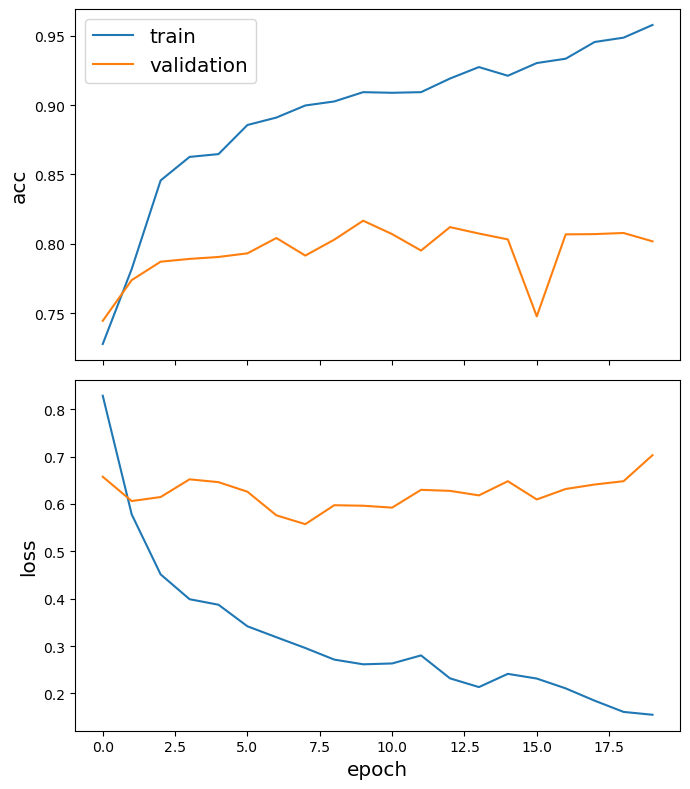

In [252]:
sg.utils.plot_history(history)

In [ ]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

241/249 [============================>.] - ETA: 1s - loss: 0.6790 - acc: 0.8060